### Import libraries 

In [35]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [37]:
# Load the dataset 
path = "..\data\insurance.csv"

# Read the CSV file into a DataFrame
data_df = pd.read_csv(path)

# Display the first 5 rows of the dataset to get an overview
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
# Check for missing values in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## No missing values found in the dataset

In [8]:
# Display data types of each column to understand feature formats
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## All data types look appropriate:
### - Numerical features: age, bmi, children, charges
### - Categorical features: sex, smoker, region


In [11]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# Generate descriptive statistics for numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Descriptive Statistics - Summary
- **Age**: Min = 18, Max = 64, Mean ≈ 39 — covering a broad adult age range.
- **BMI**: Mean ≈ 30.7, which is in the overweight range. Max value (53.13) might indicate outliers.
- **Children**: Most individuals have 0 to 2 children; max is 5.
- **Charges**: Highly variable, with a large standard deviation and possible skewness due to some very high values.


In [16]:
# Set global visualization styles for consistency
sns.set_style('darkgrid') 
plt.rcParams['font.size'] = 14  
plt.rcParams['figure.figsize'] = (10, 6) 
plt.rcParams['figure.facecolor'] = 'white' 

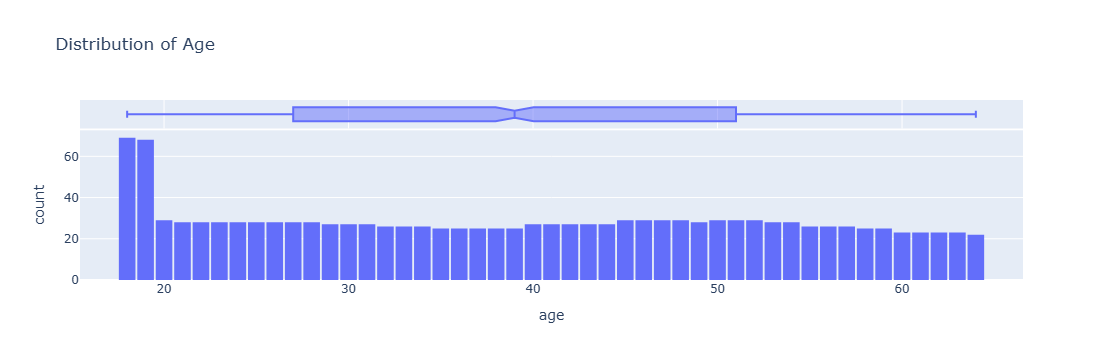

In [41]:
# Visualize the distribution of 'age' with a histogram and box plot
fig = px.histogram(
    df,
    x='age',
    marginal='box',     
    nbins=47,           
    title='Distribution of Age'
)
fig.update_layout(bargap=0.1)  
fig.show()


### Observation:
There is a noticeable spike in the number of individuals aged 18 and 19.
This could indicate a group of young adults recently added to the dataset,
or a demographic focus on young policyholders.


Text(0.5, 1.0, 'Number of Smokers and Non-Smokers (Age 18)')

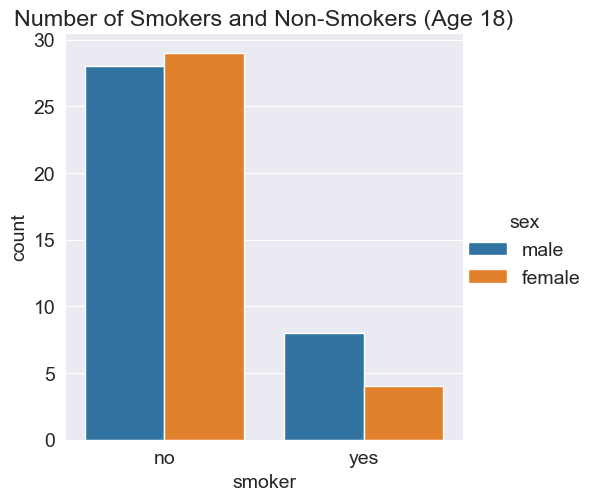

In [31]:
# Visualize the number of smokers vs non-smokers among 18-year-olds, separated by gender
sns.catplot(
    x="smoker", 
    kind="count", 
    hue="sex", 
    data=df[df.age == 18]
)

plt.title("Number of Smokers and Non-Smokers (Age 18)")


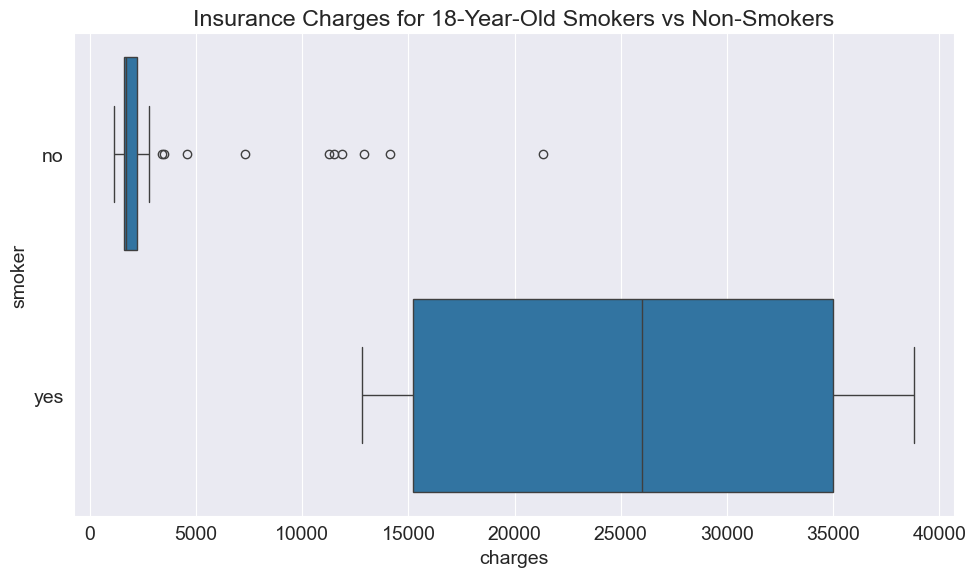

In [33]:
# Box plot to compare insurance charges between smokers and non-smokers at age 18
sns.boxplot(
    y="smoker", 
    x="charges", 
    data=df[df.age == 18]
)
plt.title("Insurance Charges for 18-Year-Old Smokers vs Non-Smokers")
plt.tight_layout()


### Observation:
Among 18-year-olds, smokers have significantly higher insurance charges than non-smokers.
The box plot shows a clear separation, indicating smoking is a strong predictor of charges.


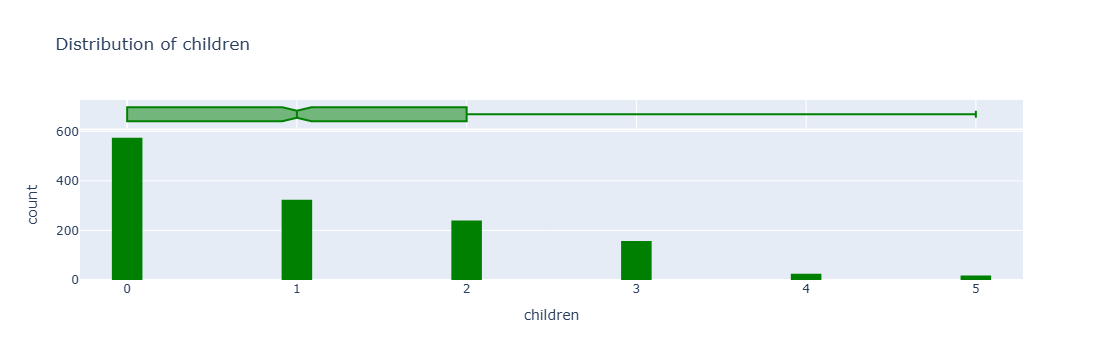

In [43]:
fig = px.histogram(df, 
                   x='children', 
                   marginal='box', 
                   nbins=47, 
                   color_discrete_sequence=['green'],
                   title='Distribution of children')
fig.update_layout(bargap=0.1)
fig.show()

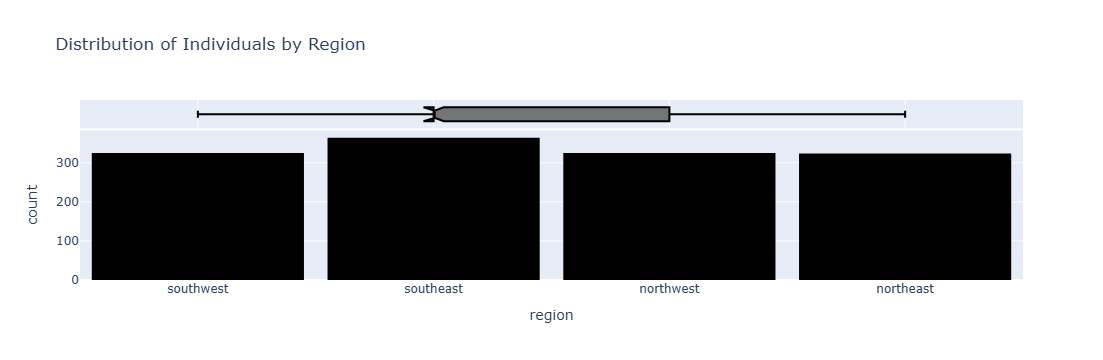

In [45]:
# Histogram showing the distribution of individuals across different regions
fig = px.histogram(
    df, 
    x='region', 
    color_discrete_sequence=['black'],
    marginal='box',  
    title='Distribution of Individuals by Region'
)
fig.update_layout(bargap=0.1)
fig.show()



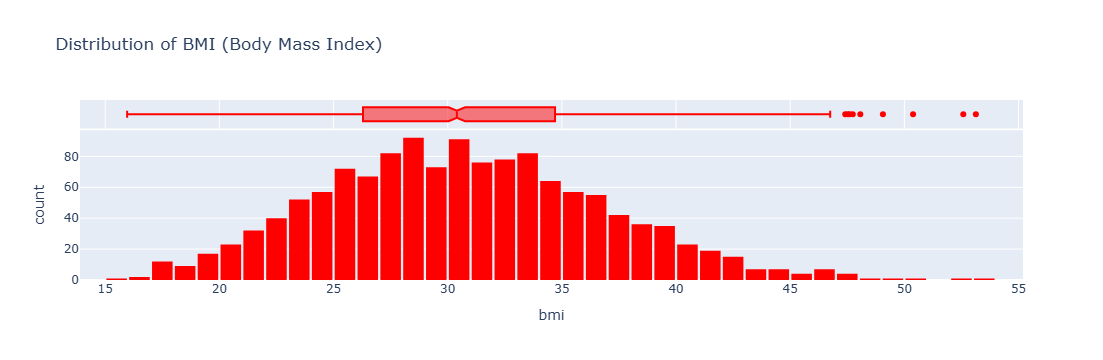

In [44]:
# Visualize the distribution of BMI (Body Mass Index) with histogram and box plot
fig = px.histogram(
    df, 
    x='bmi', 
    marginal='box',  
    color_discrete_sequence=['red'], 
    title='Distribution of BMI (Body Mass Index)'
)
fig.update_layout(bargap=0.1)
fig.show()


### Observation:
BMI values in the dataset range from ~16 to ~53.
The average BMI is around 30 , which falls in the overweight category.
There are a few outliers with very high BMI values (> 47), indicating cases of severe obesity.



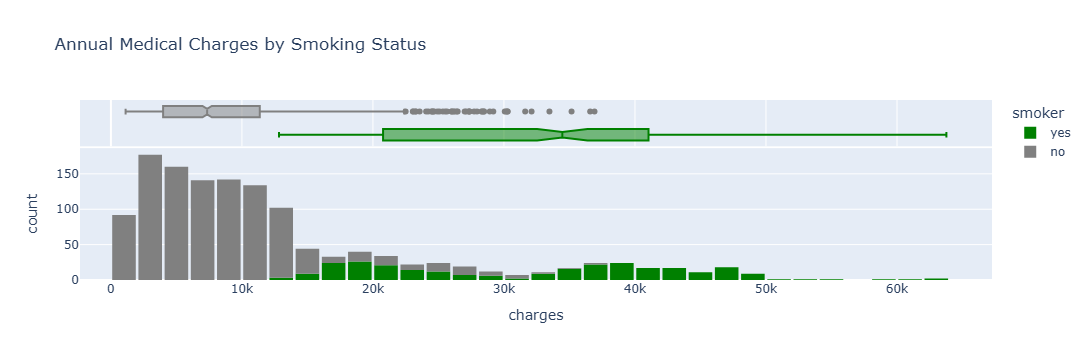

In [48]:
# Visualize the distribution of annual medical charges, segmented by smoking status
fig = px.histogram(
    df, 
    x='charges', 
    marginal='box',  
    color='smoker',  
    color_discrete_sequence=['green', 'grey'], 
    title='Annual Medical Charges by Smoking Status'
)
fig.update_layout(bargap=0.1)
fig.show()


### Observation: The gap between smokers and non-smokers is visually significant, highlighting smoking as a strong predictor of higher medical costs.



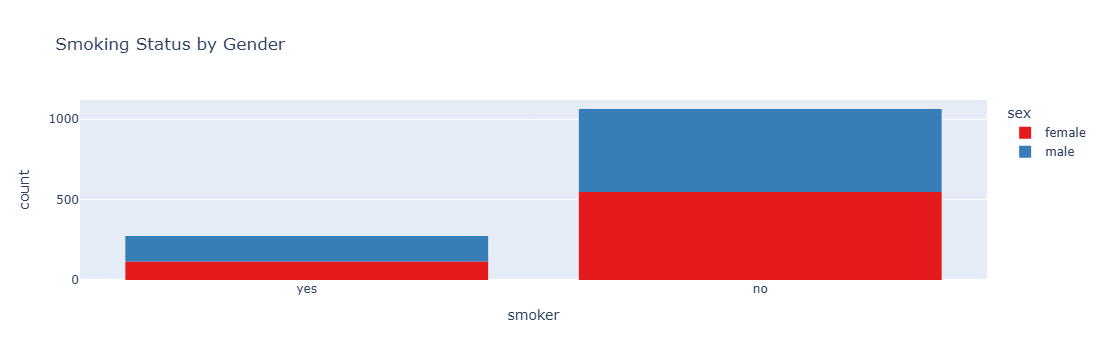

In [60]:
# Show the distribution of smokers and non-smokers, broken down by gender
fig = px.histogram(
    df, 
    x='smoker', 
    color='sex', 
    title='Smoking Status by Gender',
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_layout(bargap=0.2)
fig.show()


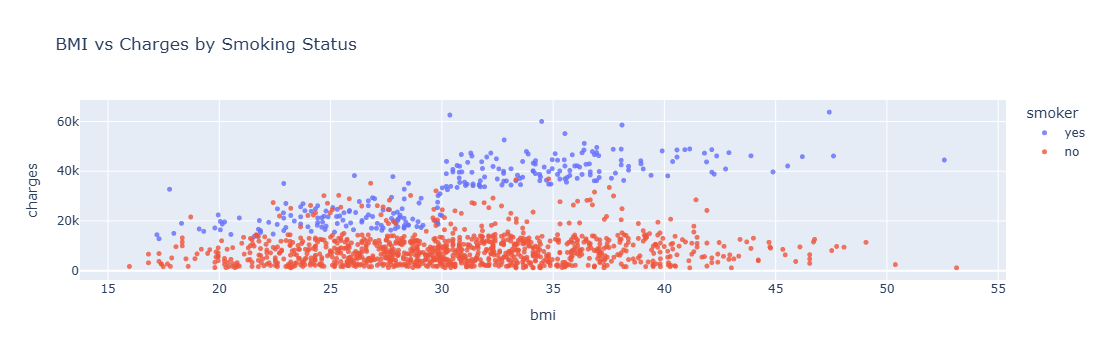

In [64]:
# Scatter plot showing the relationship between BMI and insurance charges,
# differentiated by smoking status and displaying gender on hover
fig = px.scatter(
    df, 
    x='bmi', 
    y='charges', 
    color='smoker', 
    opacity=0.8, 
    hover_data=['sex'], 
    title='BMI vs Charges by Smoking Status'
)
fig.update_traces(marker_size=5)
fig.show()


### Observations on BMI and Insurance Charges

**BMI is not a strong direct indicator** of insurance charges overall, which is somewhat unexpected. However, there is a noteworthy exception: individuals with a **BMI above 30 who also smoke** tend to have significantly higher insurance charges. This suggests a potential **interaction effect** between high BMI and smoking status on insurance costs.


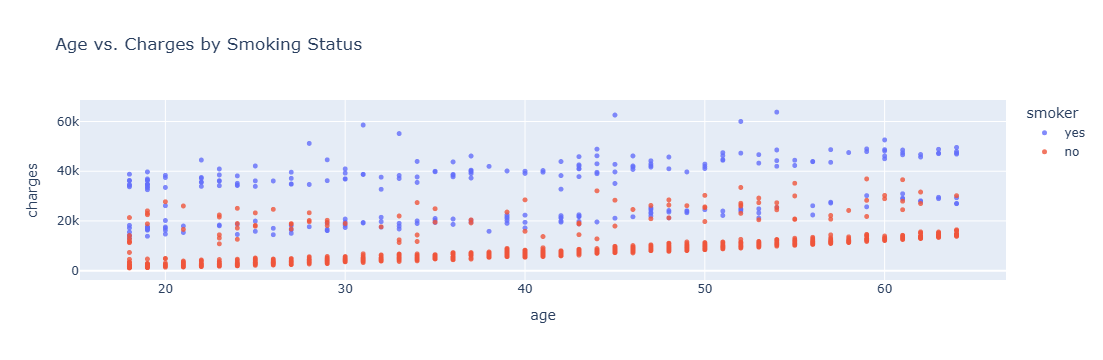

In [88]:
# Scatter plot showing the relationship between age and insurance charges,
# differentiated by smoking status and displaying gender on hover
fig = px.scatter(
    df, 
    x='age', 
    y='charges', 
    color='smoker', 
    opacity=0.8, 
    hover_data=['sex'], 
    title='Age vs. Charges by Smoking Status'
)
fig.update_traces(marker_size=5)
fig.show()


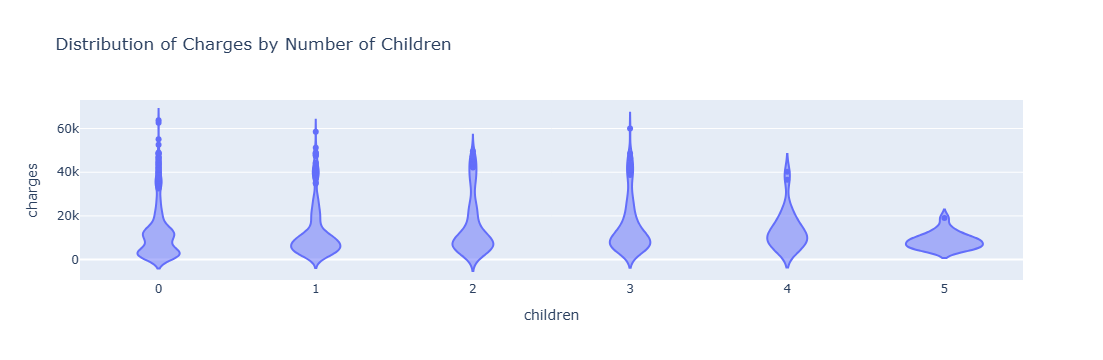

In [90]:
# Violin plot showing the distribution of insurance charges across different numbers of children
fig = px.violin(
    df, 
    x='children', 
    y='charges', 
    title='Distribution of Charges by Number of Children'
)
fig.show()

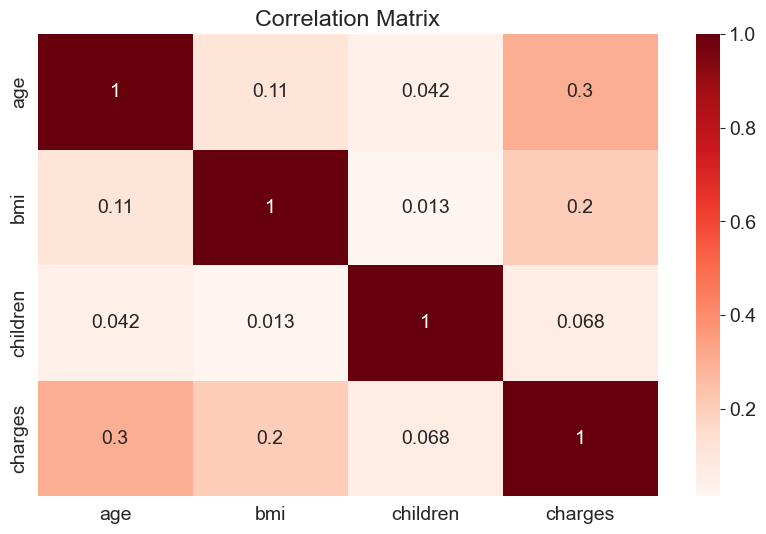

In [94]:
# Display correlation matrix between numerical features
sns.heatmap(
    df.select_dtypes(include='number').corr(), 
    cmap='Reds', 
    annot=True
)
plt.title('Correlation Matrix')
plt.show()


In [113]:
# Initialize LabelEncoder instance
le = LabelEncoder()

# Encode 'sex' column (male/female)
df['sex'] = le.fit_transform(df['sex'])

# Encode 'smoker' column (yes/no)
df['smoker'] = le.fit_transform(df['smoker'])

# Encode 'region' column (southwest, southeast, northwest, northeast)
df['region'] = le.fit_transform(df['region'])


In [115]:
# Calculate and sort the correlation (in %) of all features with 'charges'
df.corr()['charges'].sort_values() * 100


region       -0.620823
sex           5.729206
children      6.799823
bmi          19.834097
age          29.900819
smoker       78.725143
charges     100.000000
Name: charges, dtype: float64

### Feature Correlation with Charges (%):
- **Smoker**: 78.7% — Strongest influence on medical charges.
- **Age**: 29.9% — Older individuals tend to pay more.
- **BMI**: 19.8% — Higher BMI is moderately associated with higher charges.
- **Children** & **Sex**: Weak correlation (~6–7%), likely low predictive power.
- **Region**: Very weak negative correlation (-0.6%), likely insignificant.
